## Exercises

In [2]:
import numpy as np
import graphviz as gz
import itertools
import sys
sys.path.append('..')
from utils.graph_utils import digraph_from_numpy_array

### Exercise 3.1
The joint distribution corresponding to the given BBN is the following
$$
p(A, H, D, U, P) = p(A \mid U)p(U \mid P, D)p(H \mid P)p(P)p(D).
$$
Then, we can calculate $p(P = tr)$ as follows:
$$
p(P = tr) = \sum_{A,H,U,D} p(A, H, U, D, P = tr) = \sum_{A,H,U,D} p(A \mid U)p(U \mid P, D)p(H \mid P)p(P)p(D).
$$

To do so, we define the conditional probability tables in the following format:
1. A 1D array is used to store the probabilities.
2. For a conditional distribution $P(A, B \mid C, D)$ the array is indexed with the value
$$
2^{(A = tr) + (B = tr) + (C = tr) + (D = tr)} - 1
$$
in the same order as the variables are listed in the distribution.
3. According to this indexing, for an array $A$ of length $L$, $A[i] + A[i + L/2] = 1$ for $i < L/2$.

In [3]:
pAgU = np.array([0.5, 0.05, 0.5, 0.95])
pUgPaD = np.array([0.99, 0.1, 0.1, 0.0001, 0.01, 0.9, 0.9, 0.999])
pHgP = np.array([0.8, 0.1, 0.2, 0.9])
pP = np.array([0.8, 0.2])
pD = np.array([0.6, 0.4])

prob_sum = 0
P = '1'
for A in '01':
    for H in '01':
        for U in '01':
            for D in '01':
                prod = 1
                prod *= pAgU[int(A + U, 2)]
                prod *= pUgPaD[int(U + P + D, 2)]
                prod *= pHgP[int(H + P, 2)]
                prod *= pP[int(P, 2)]
                prod *= pD[int(D, 2)]
                prob_sum += prod
prob_sum

0.19992799999999999

### Exercise 3.2
The distribution $p(a, b, c) = p(c \mid a, b)p(a)p(b)$ corresponds to the following BBN:

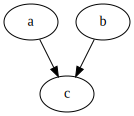

In [4]:
G = gz.Digraph()
G.edges(['ac', 'bc'])
G

#### Part (i)
If we have no information about $c$, $a$ and $b$ are independent. Hence, $a \ci b \mid \varnothing$.

#### Part (ii)
If we condition on $c$, we have some information about both $a$ and $b$, and we know that $a$ and $b$ combine to result in $c$. Hence, $a$ and $b$ are not independent conditioned on $c$.

### Exercise 3.3

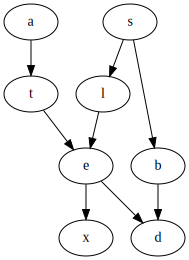

In [5]:
G = gz.Digraph()
G.edges(['at', 'te', 'ex', 'le', 'sl', 'sb', 'bd', 'ed'])
G

#### $t \ci s \mid d$ ?
In both paths from $t$ to $s$ there isn't a blocking node. Hence, both paths induce graphical dependence.

Recall that a node on a path is blocking if it is either
1. a node who is a collider and neither it nor any of its descendants are in the condition set, or
2. a node who is not a collider and it is in the condition set.

#### $l \ci b \mid s$ ?
Both paths from $l$ to $b$ are blocked.

1. Upper path is blocked because of $s$. $s$ is not a collider and it is in the condition set.
2. Lower path is blocked because of $d$. $d$ is a collider and neither it nor any of its descendants are in the condition set.

#### $a \ci s \mid l$ ?
Both paths from $a$ to $s$ are blocked.

1. $a-t-e-l-s$ is blocked because of $l$. $l$ is not a collider and it is in the condition set.
2. $a-t-e-d-b-s$ is blocked because of $d$. $d$ is a collider and neither it nor any of its descendants are in the condition set.

#### $a \ci s \mid l, d$ ?
In this case, $a-t-e-d-b-s$ is not blocked, and hence $a$ is not conditionally independent from $l$. This path is not blocked because now $d$ is a collider and it is in the condition set. Hence, $d$ doesn't block the path.

### Exercise 3.4
$$
p(\cdot) = p(x \mid e)p(d \mid e, b)p(e \mid t, l)p(t \mid a)p(l \mid s)p(b \mid s)p(a)p(s)
$$

In [6]:
pXgE = np.array([0.95, 0.02, 0.05, 0.98])
pDgEaB = np.array([0.9, 0.2, 0.3, 0.1, 0.1, 0.8, 0.7, 0.9])
pEgTaL = np.array([1, 0, 0, 0, 0, 1, 1, 1])
pTgA = np.array([0.99, 0.95, 0.01, 0.05])
pLgS = np.array([0.99, 0.9, 0.01, 0.1])
pBgS = np.array([0.7, 0.4, 0.3, 0.6])
pA = np.array([0.99, 0.01])
pS = np.array([0.5, 0.5])

pD = np.array([0., 0.])
pDgS = np.array([0., 0., 0., 0.])
for d in '01':
    for s in '01':
        for x in '01':
            for e in '01':
                for t in '01':
                    for l in '01':
                        for a in '01':
                            for b in '01':
                                prod = 1
                                prod *= pXgE[int(x + e, 2)]
                                prod *= pDgEaB[int(d + e + b, 2)]
                                prod *= pEgTaL[int(e + t + l, 2)]
                                prod *= pTgA[int(t + a, 2)]
                                prod *= pLgS[int(l + s, 2)]
                                prod *= pBgS[int(b + s, 2)]
                                prod *= pA[int(a, 2)]
                                prod *= pS[int(s, 2)]
                                pD[int(d, 2)] += prod
                                pDgS[int(d + s, 2)] += prod/pS[int(s, 2)]

In [7]:
pDgS

array([ 0.6808668,  0.447192 ,  0.3191332,  0.552808 ])

* $p(D = tr) = $ {{pD[1]}}
* $p(D = fa) = $ {{pD[0]}}

* $p(D = tr \mid S = tr) = $ {{pDgS[3]}}
* $p(D = fa \mid S = tr) = $ {{pDgS[1]}}
* $p(D = tr \mid S = fa) = $ {{pDgS[2]}}
* $p(D = fa \mid S = fa) = $ {{pDgS[0]}}

### Exercise 3.5
If we interpret curing bronchitis causally, then we intervene the network at node $b$ and hence, edge $s - b$ should be removed. This would correspond to an experiment in which the doctor first cures his/her patient's bronchitis, and then conducts tests to check shortness of breath. Hence, the system would correspond to

$$
p(a, t, e, x, l, s, d \mid do(b = fa)) = \prod_{x \in X \setminus b} p(x \mid pa(x)).
$$

This differs from $p(d = tr \mid b = fa)$ non-casual interpretation because in the non-casual interpretation, not having bronchitis also depends on smoking status. If we assume that there is a really strong dependence between smoking and bronchitis, $p(d = tr \mid b = fa)$ would sample from non-smoking part of the population. On the other hand, a casual interpretation of curing the bronchitis would allow us to sample all persons regardless of their smoking status.

### Exercise 3.7
$p(A, S, C) = p(C \mid A, S)p(A)p(S)$ corresponds to

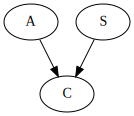

In [8]:
G = gz.Digraph()
G.edges(['AC', 'SC'])
G

#### $A \ci S \mid \varnothing$ ?
True, because $C$ is a collider and it is not in the condition set.

#### $A \ci S \mid C$ ?
False, because $C$ cannot block the dependence path between $A$ and $S$. Hence, $A$ and $S$ are d-connected, and they are not conditionally independent

#### How to incorporate building industry variable?
$$
p(A, B, C, S) = p(C \mid A, S)p(A \mid B)p(S \mid B)p(B).
$$
which corresponds to the diamond shape belief network:

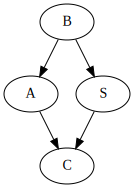

In [9]:
G.edges(['BA', 'BS'])
G

### Exercise 3.8

#### Part (1)
$
\begin{align}
p(B = tr \mid W = tr) &= \frac{p(B = tr, W = tr)}{p(W = tr)} \\
		      &= \frac{\sum_{A, G}p(B = tr, W = tr, A, G)}{\sum_{A, B, G}p(B, W = tr, A, G)} \\
		      &= \frac{p(B = tr)\sum_{A, G} p(W = tr \mid A)p(G \mid A)p(A \mid B = tr)}{\sum_{A, B, G} p(W = tr \mid A)p(G \mid A)p(A \mid B)p(B)} \\
\end{align}
$

$
\begin{align}
p(B = tr \mid W = tr, G = fa) &= \frac{p(B = tr, W = tr, G = fa)}{p(W = tr, G = fa)} \\
			      &= \frac{\sum_A p(W = tr \mid A)p(G = fa \mid A)p(A \mid B = tr)p(B = tr)}{\sum_{A, B} p(W = tr \mid A)p(G = fa \mid A)p(A \mid B)p(B)}
\end{align}
$

#### Part (2)
In this case, we have the following information
$
\begin{align}
p(G = fa \mid \tilde{G}) &= 0.9 \\
p(G = tr \mid \tilde{G}) &= 0.1 \\
p(W = tr \mid \tilde{W}) &= 0.3 \\
p(W = tr \mid \tilde{W}) &= 0.7 \\
\end{align}
$
Since we have albeit uncertain evidence about $G$ and $W$ separately, we can do the following derivation
$
\begin{align}
p(G, W \mid \tilde{G}, \tilde{W}) &= p(W \mid G, \tilde{G}, \tilde{W})p(G \mid \tilde{G}, \tilde{W}) \\
				 &= p(W \mid G, \tilde{W})p(G \mid \tilde{G}) && \\
				 &= p(W \mid \tilde{W})p(G \mid \tilde{G}) \\
\end{align}
$
because of the following statements:
1. Evidence about $W$ doesn't directly tell anything about $G$, and vice versa,
2. If we have evidence about $W$, we completely specify the distribution of $W$ regardless of any dependencies it has with other variables. Hence, $p(W \mid X_1, \dots, X_n, \tilde{W}) = p(W \mid \tilde{W})$

Afterwards, we can compute the desired distributions using Jeffrey's rule as follows:
$$
p(B = tr \mid \tilde{W}) = \sum_W p(B = tr \mid W)p(W \mid \tilde{W}).
$$
$
\begin{align}
p(B = tr \mid \tilde{W}, \tilde{G}) &= \sum_{G, W} p(B = tr \mid G, W)p(G, W \mid \tilde{G}, \tilde{W}) \\
				    &= \sum_{G, W} p(B = tr \mid G, W)p(G \mid \tilde{G})p(W \mid \tilde{W})
\end{align}
$

### Exercise 3.9

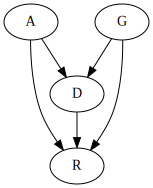

In [10]:
G = gz.Digraph()
G.edges(['AD', 'GD', 'AR', 'DR', 'GR'])
G

$
\begin{align}
p(R = tr \mid D = tr) &= \frac{p(R = tr, D = tr)}{p(D = tr)} \\
		      &= \frac{\sum_{A, G} p(R = tr \mid D = tr, A, G)p(D = tr \mid A, G)p(A)p(G)}{\sum_{A, G, R} p(R \mid D = tr, A, G)p(D = tr \mid A, G)p(A)p(G)}
\end{align}
$

If we intervene on node $D$ and set it to $tr$, then the new belief network becomes:

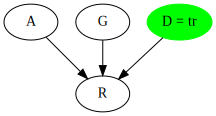

In [11]:
G = gz.Digraph()
G.edges(['AR', 'GR'])
G.node('D = tr', color='green', style='filled')
G.edge('D = tr', 'R')
G

Let $\tilde{p}$ represent the distribution of this new network. Then, $p(R = tr \mid do(D = tr), A = yo) = \tilde{p}(R = tr \mid D = tr, A = yo)$. Hence
$
\begin{align}
\tilde{p}(R = tr \mid D = tr, A = yo) &= \frac{p(D = tr)p(A = yo) \sum_G p(R = tr, D = tr, A = yo, G)p(G)}{p(D = tr)p(A = yo) \sum_{R, G} p(R, D = tr, A = yo, G)p(G)} \\
				      &= \frac{\sum_G p(R = tr, D = tr, A = yo, G)p(G)}{\sum_{R, G} p(R, D = tr, A = yo, G)p(G)}
\end{align}
$

### Exercise 3.12

In [12]:
def skeleton(A):
    """
    Given a (directed/undirected) graph A, this function returns the
    skeleton of A.
    
    Skeleton of a graph is obtained by making every edge in A
    bi-directional and setting its value to 1.
    
    Parameters
    ----------
    A : numpy.array
        Adjacency matrix of the graph represented by A.
        
    Returns
    -------
    skeleton : numpy.array
        Adjacency matrix of the skeleton of A.
        
    Complexity
    ----------
    B(n) : n^2 for nxn A.
    W(n) : n^2 for nxn A.
    A(n) : n^2 for nxn A.
    """
    skeleton = np.copy(A)
    n = len(skeleton)
    
    skeleton[skeleton != 0] = 1
    for i in range(n):
        for j in range(n):
            skeleton[i, j] |= skeleton[j, i]
            
    return skeleton  

In [13]:
def immorality_set(A):
    """
    Given a graph A, this function returns the set of immoralities
    in A.
    
    An immorality is defined as a pair ({m, n}, k) such that
    k is a child of both m and m with no connection between m and n.
    
    Parameters
    ----------
    A : numpy.array
        Adjacency matrix of the graph represented by A.
        
    Returns
    -------
    immoral_set : set
        Set of pairs ({m, n}, k) whose first element is a set of nodes and
        the second element the target of the immorality.
        
    Complexity
    ----------
    B(n) : n^4 for nxn A.
    W(n) : n^4 for nxn A.
    A(n) : n^4 for nxn A.
    
    TODO : Come up with an efficient algorithm to find immoralities.
    """
    n = len(A)
    
    immoral_set = set()
    for i in range(n):
        for j in range(i):
            for k in range(n):
                for m in range(n):
                    if A[i, m] and A[j, m] and not (A[i, j] or A[j, i]):
                        immoral_set.add((frozenset((i, j)), m))
    
    return immoral_set

In [14]:
def markov_equiv(A, B):
    """
    Given two belief networks represented as DAGs with associated matrices A and B,
    this function returns True if A and B are Markov equivalent; and False otherwise.
    
    Parameters
    ----------
    A : numpy.array
        Adjacency matrix of the first DAG.
    B : numpy.array
        Adjacency matrix of the second DAG.
        
    Returns
    -------
    equiv : bool
        True if A and B are Markov equivalent; false, otherwise.
        
    Complexity
    ----------
    B(n) : n^4 for nxn A.
    W(n) : n^4 for nxn A.
    A(n) : n^4 for nxn A.
    """
    if A.shape != B.shape:
        return False
        
    if not np.array_equal(skeleton(A), skeleton(B)):
        return False
    
    return immorality_set(A) == immorality_set(B)

### Exercise 3.13

Graph of A


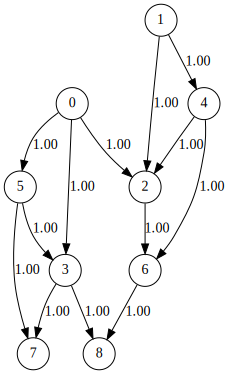

Graph of B


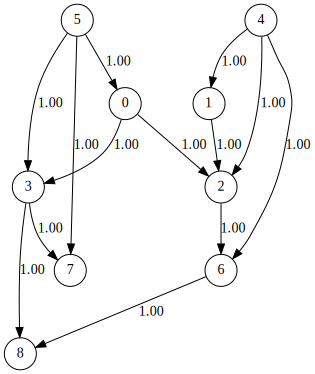

In [15]:
A = np.array([
    [0, 0, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
])
B = np.array([
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
])
print('Graph of A')
display(digraph_from_numpy_array(A))
print('Graph of B')
display(digraph_from_numpy_array(B))

In [16]:
print('Skeleton of A')
print(skeleton(A))
print('Skeleton of B')
print(skeleton(B))
print('skeleton(A) == skeleton(B) : {}'.format(np.array_equal(skeleton(A), skeleton(B))))
print()
print('Immoralities in A')
print(immorality_set(A))
print('Immoralities in B')
print(immorality_set(B))
print('Same immoralities : {}'.format(immorality_set(A) == immorality_set(B)))
print()
print('Markov Equivalent(A, B) : {}'.format(markov_equiv(A, B)))

Skeleton of A
[[0 0 1 1 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [1 1 0 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 1 1]
 [0 1 1 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]]
Skeleton of B
[[0 0 1 1 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [1 1 0 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 1 1]
 [0 1 1 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]]
skeleton(A) == skeleton(B) : True

Immoralities in A
{(frozenset({3, 6}), 8), (frozenset({0, 1}), 2), (frozenset({0, 4}), 2)}
Immoralities in B
{(frozenset({3, 6}), 8), (frozenset({0, 1}), 2), (frozenset({0, 4}), 2)}
Same immoralities : True

Markov Equivalent(A, B) : True


### Exercise 3.14
#### The graph of the computer network
First, we draw the graph of the computer network. Note that this graph has nothing to do with Bayes Nets.

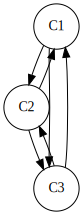

In [17]:
adj_mat = np.reshape(np.ones(9), (3, 3))
adj_mat[np.diag_indices(3)] = 0
digraph_from_numpy_array(adj_mat, labels=['C1', 'C2', 'C3'], edge_values=False)

#### Describing the Bayes Net
1. When we consider the $1$ timestep paths, each $C_{ij}$ is independent for $i \neq j$. Hence, if we draw the corresponding Bayes Net, none of $C_{ij}$s would have direct links between them.
2. When we consider the $2$ timestep paths, direct dependencies get a little more complicated. However, before describing these dependencies, note that $C_{ij}(2)$ and $C_{ik}(2)$ or $C_{ij}(2)$ and $C_{kj}(2)$ **do not directly depend on each other**. In general, knowing one can alter our beliefs about the other one through $C_{ij}$ terms, i.e. $1$ timestep probabilities. Hence, each $C_{ij}(2)$ would not have direct links between them either for $i \neq j$.
3. $C_{ij}(2) = 1 \implies C_{ij} = 1 \lor (C_{ik} = 1 \land C_{kj} = 1)$ for $k = \{1, 2, 3\} \setminus \{i, j\}$.
Hence, $C_{ij}$ directly affects the value of $C_{ij}(2), C_{ik}(2), C_{kj}(2)$.

According to these statements we draw the Bayesian Network corresponding to the probabilistic system described in the question.

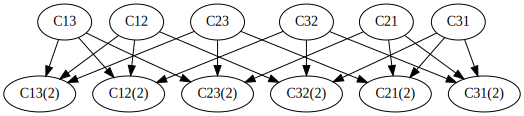

In [18]:
G = gz.Digraph()
computer_set = {1, 2, 3}
roots = ('C{}{}'.format(*perm) for perm in itertools.permutations(computer_set))
edges = []
for root in roots:
    i, j = [int(c) for c in root[1:]]
    k = (computer_set - {i, j}).pop()
    edges.append((root, '{}(2)'.format(root)))
    edges.append((root, 'C{}{}(2)'.format(i, k)))
    edges.append((root, 'C{}{}(2)'.format(k, j)))

G.edges(edges)
G

#### $p(C_{12} = 1 \mid C_{12}(2) = 1, C_{23}(2) = 0)$
$$
    p(C_{12} = 1 \mid C_{12}(2) = 1, C_{23}(2) = 0) = \frac{p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{12} = 1)p(C_{12} = 1)}{p(C_{12}(2) = 1, C_{23}(2) = 0)}
$$
##### $p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{12} = 1)$
Note that $p(C_{ij}(2) = 1 \mid C_{ij} = 1) = 1$ according to the definition of $2$ timestep definition. Hence,
$
\begin{align}
p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{12} = 1) &= p(C_{23}(2) = 0 \mid C_{12} = 1) \\
						&= p(C_{23} = 0)(1 - p(C_{21} = 1, C_{13} = 1)) \\
						&= 0.9(1 - 0.1 \cdot 0.1) \\
						&= 0.891.
\end{align}
$
##### $p(C_{12}(2) = 1, C_{23}(2) = 0)$
To calculate this joint probability, we don't need to marginalize over the whole distribution due to the structure of our Bayes Net. Although $C_{12}(2)$ and $C_{23}(2)$ are not (unconditionally) independent of each other, **they are independent given $C_{13}$**, i.e. $C_{12}(2) \ci C_{23}(2) \mid C_{13}$. This can be easily verified with the following two observations
1. If $C_{13}$ is given, then $C_{12}(2) - C_{13} - C_{23}(2)$ path is blocked since $C_{13}$ is not a collider and is in the condition set.
2. Any other indirect path between $C_{12}(2)$ and $C_{23}(2)$ is blocked since each such path must contain a $C_{ij}(2)$ node different than $C_{12}(2)$ and $C_{23}(2)$, and each such node must be a collider without being in the condition set.

After this conditional independence realization, we can calculate this probability as follows:

$
\begin{align}
p(C_{12}(2) = 1, C_{23}(2) = 0) &= \sum_{C_{13}} p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{13})p(C_{13}) \\
				&= \sum_{C_{13}} p(C_{12}(2) = 1 \mid C_{13})p(C_{23}(2) = 0 \mid C_{13})p(C_{13}) \\
				&= (0.1 + 0.1)(0.9 \cdot 0.9)0.1 + 0.1 \cdot 0.9 \cdot 0.9 \\
				&= 0.0972.
\end{align}
$
##### Final Result
$$
    p(C_{12} = 1 \mid C_{12}(2) = 1, C_{23}(2) = 0) = \frac{0.891 \cdot 0.1}{0.0972} = 0.916.
$$
We see that our posterior belief about $C_{12} = 1$ increases drastically. This makes sense since our evidence suggests that $C_{12}(2) = 1$.

#### $p(C_{32} = 1 \mid C_{12}(2) = 1, C_{23}(2) = 0)$
In the first question, computing the likelihood was straightforward due to the given variable. In this case, the likelihood is $p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{32} = 1)$. We cannot get rid of any variable directly, or separate the joint probability into multiplicatives. Again, we need to look for conditional independence cases to efficiently calculate the likelihood. Again, we use $C_{13}$. Note that $\{C_{12}(2), C_{32}\} \ci C_{23}(2) \mid C_{13}$ since all the paths from one set to the other is blocked. Then, we can calculate the likelihood as follows:

$
\begin{align}
p(C_{12}(2) = 1, C_{23}(2) = 0 \mid C_{32} = 1) &= \frac{p(C_{12}(2) = 1, C_{23}(2) = 0, C_{32} = 1)}{p(C_{32} = 1)} \\
						&= 10p(C_{12}(2) = 1, C_{23}(2) = 0, C_{32} = 1).
\end{align}
$
where
$
\begin{align}
p(C_{12}(2) = 1, C_{23}(2) = 0, C_{32} = 1) &= \sum_{C_{13}} p(C_{12}(2) = 1, C_{23}(2) = 0, C_{32} = 1 \mid C_{13})p(C_{13}) \\
					    &= \sum_{C_{13}} p(C_{12}(2) = 1, C_{32} = 1 \mid C_{13})p(C_{23}(2) = 0 \mid C_{13}) \\
					    &= \sum_{C_{13}} p(C_{12}(2) = 1 \mid C_{32} = 1, C_{13})p(C_{32} = 1)p(C_{23}(2) = 0 \mid C_{13}) \\
					    &= (p(C_{12}(2) = 1 \mid C_{32} = 1, C_{13} = 1)p(C_{32} = 1)p(C_{23}(2) = 0 \mid C_{13} = 1)) + (p(C_{12}(2) = 1 \mid C_{32} = 1, C_{13} = 0)p(C_{32} = 1)p(C_{23}(2) = 0 \mid C_{13} = 0)) \\
                        &= 1 \cdot 0.1 \cdot 0.9 \cdot 0.9 + 0.1 \cdot 0.1 \cdot 0.9 \\
                        &= 0.09.
\end{align}
$
With this likelihood, $p(C_{32} = 1 \mid C_{12}(2) = 1, C_{23}(2) = 0) = 0.092$. In this example, we see that our posterior belief did not change that much from our prior belief. This also makes sense because we did not get a game-changing evidence about $C_{32}$.